In [1]:
import pandas as pd

data_file_base = "ETHBVOLUSDT-BVOLIndex-2024-08-"
number_of_files = 31
beginning = 1

In [3]:
df = pd.read_csv(
    data_file_base
    + (str(beginning) if beginning > 9 else "0" + str(beginning))
    + ".csv"
)
for i in range(beginning + 1, beginning + number_of_files):
    df = pd.concat(
        [df, pd.read_csv(data_file_base + (str(i) if i > 9 else "0" + str(i)) + ".csv")]
    )

In [4]:
df

,calc_time,symbol,base_asset,quote_asset,index_value
0,1722470400000,ETHBVOLUSDT,ETHBVOL,USDT,57.0783
1,1722470401000,ETHBVOLUSDT,ETHBVOL,USDT,57.0784
2,1722470402000,ETHBVOLUSDT,ETHBVOL,USDT,57.0784
3,1722470403000,ETHBVOLUSDT,ETHBVOL,USDT,57.0785
4,1722470404000,ETHBVOLUSDT,ETHBVOL,USDT,57.0786
...,...,...,...,...,...
86352,1725148795000,ETHBVOLUSDT,ETHBVOL,USDT,66.4627
86353,1725148796000,ETHBVOLUSDT,ETHBVOL,USDT,66.4610
86354,1725148797000,ETHBVOLUSDT,ETHBVOL,USDT,66.4593
86355,1725148798001,ETHBVOLUSDT,ETHBVOL,USDT,66.4576


In [5]:
df.drop(["symbol", "base_asset", "quote_asset"], inplace=True, axis=1)
df.rename(columns={"calc_time": "time", "index_value": "bvol"}, inplace=True)
df["time"] = df["time"].apply(lambda x: x // 1000)

In [6]:
df

,time,iv
0,1722470400,57.0783
1,1722470401,57.0784
2,1722470402,57.0784
3,1722470403,57.0785
4,1722470404,57.0786
...,...,...
86352,1725148795,66.4627
86353,1725148796,66.4610
86354,1725148797,66.4593
86355,1725148798,66.4576


<Axes: xlabel='time'>

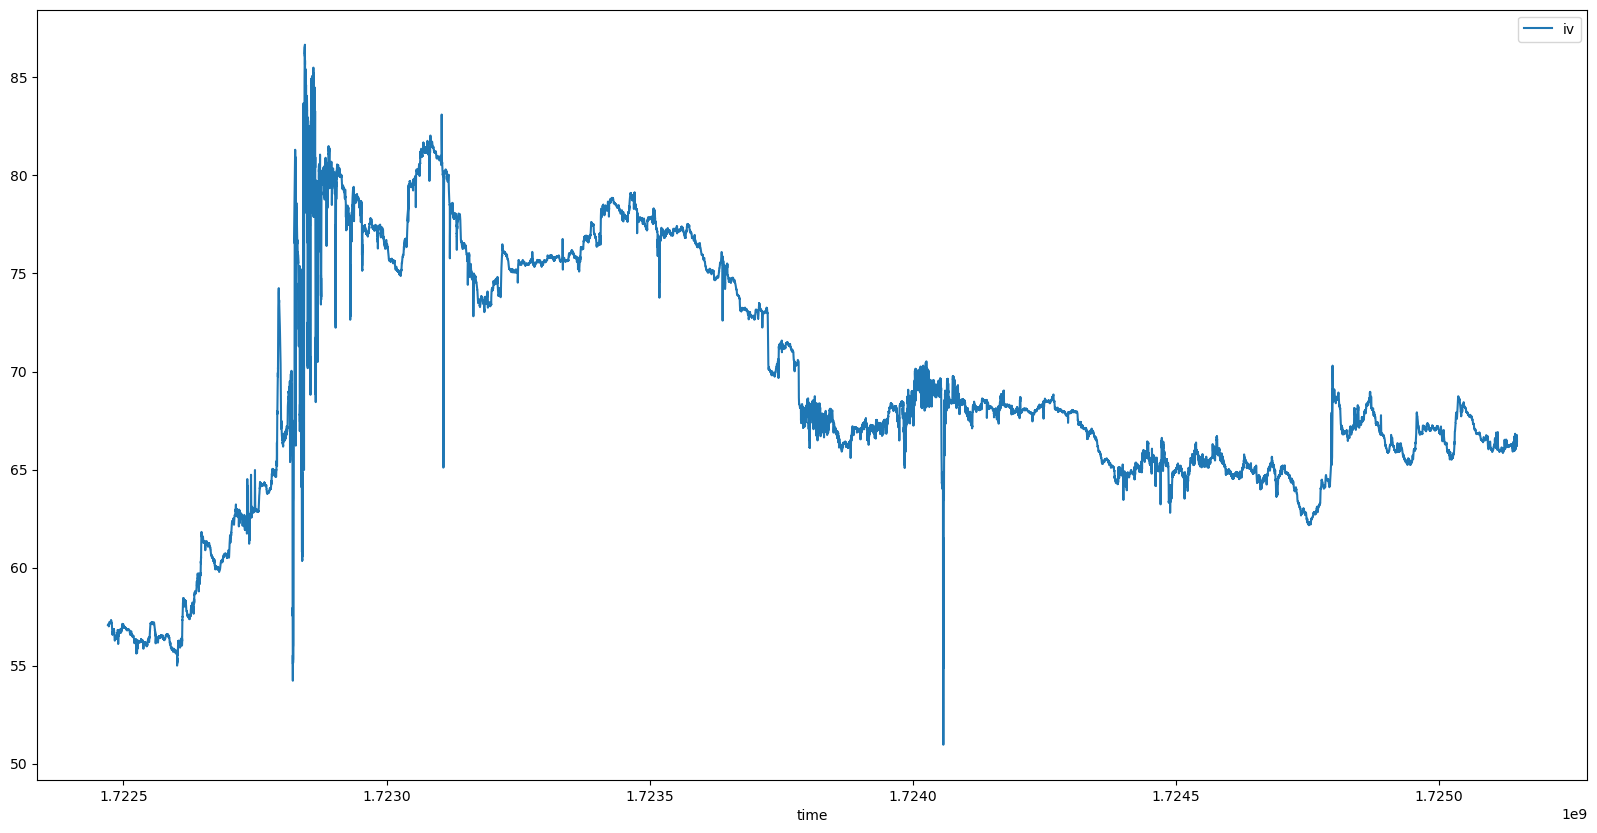

In [7]:
df.plot(x="time", y="bvol", figsize=(20, 10))

In [8]:
df.to_csv(f"{data_file_base}{beginning}>{beginning+number_of_files-1}.csv", index=False)